<a href="https://colab.research.google.com/github/YasirHabib/Deep-Learning-Advanced-Computer-Vision/blob/master/class_activation_maps_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [0]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

In [0]:
from glob import glob

In [222]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/Colab Notebooks/Deep Learning: Advanced Computer Vision/101_ObjectCategories/'

In [0]:
images = glob(path + '/*/*.jp*g')

In [225]:
total_images = len(images)
print("Total images:", total_images)

Total images: 4596


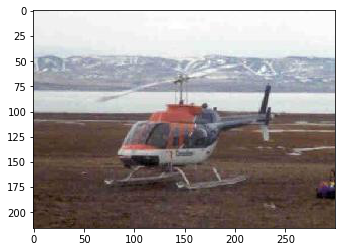

In [226]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(images)))
plt.show()

In [0]:
# add preprocessing layer to the front of resnet
res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=True)

In [228]:
# view the structure of the model
# if you want to confirm we need activation_49
res.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [229]:
# make a model to get output before flatten
partial_model = Model(
    inputs=res.input,
    outputs=res.layers[-3].output
)
partial_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_20[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [230]:
# get the feature map weights
final_dense = res.get_layer('fc1000')
W = final_dense.get_weights()[0]
print(W.shape)

(2048, 1000)


In [0]:
while True:
  img = image.load_img(np.random.choice(images), target_size=(224, 224))
  x = preprocess_input(np.expand_dims(img, 0))
  fmaps = partial_model.predict(x)[0] # 7 x 7 x 2048

#   # get predicted class
#   probs = res.predict(x)
#   classnames = decode_predictions(probs)[0]
#   print(classnames)
#   classname = classnames[0][1]
#   pred = np.argmax(probs[0])

#   # get the 2048 weights for the relevant class
#   w = W[:, pred]

#   # "dot" w with fmaps
#   cam = fmaps.dot(w)

#   # upsample to 224 x 224
#   # 7 x 32 = 224
#   cam = sp.ndimage.zoom(cam, (32, 32), order=1)

#   plt.subplot(1,2,1)
#   plt.imshow(img, alpha=0.8)
#   plt.imshow(cam, cmap='jet', alpha=0.5)
#   plt.subplot(1,2,2)
#   plt.imshow(img)
#   plt.title(classname)
#   plt.show()

#   ans = input("Continue? (Y/n)")
#   if ans and ans[0].lower() == 'n':
#     break